<a href="https://colab.research.google.com/github/RyandraAdiatma/ProjectPPH/blob/main/ProjectPPh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Tolong buatkan python 3 dan buatkan analisis datanya berupa grafik yang berwarna, serta tolong analisis secara komprehensif dan valid

Here is all the data you need:
"data_keuangan_gabungan_dengan_pph.csv"

## Data loading

### Subtask:
Load the data from "data_keuangan_gabungan_dengan_pph.csv" into a pandas DataFrame.


**Reasoning**:
Load the data from the provided CSV file into a pandas DataFrame and display its basic information.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('data_keuangan_gabungan_dengan_pph.csv', encoding='latin-1')
except UnicodeDecodeError:
    try:
        df = pd.read_csv('data_keuangan_gabungan_dengan_pph.csv', encoding='utf-8')
    except UnicodeDecodeError:
        try:
            df = pd.read_csv('data_keuangan_gabungan_dengan_pph.csv', encoding='iso-8859-1')
        except Exception as e:
            print(f"Error loading the file: {e}")
            df = pd.DataFrame() # Create an empty dataframe if all attempts fail

display(df.head())
display(df.tail())
display(df.info())

,tahun,pendapatan,beban_operasional,penyusutan_transaksi,laba_sebelum_pajak,skenario,tax_rate,tax_holiday_awal,tax_holiday_akhir,tax_holiday_status,total_penyusutan_aset,detail_aset
0,2020.0,"950,000,000","580,000,000","35,000,000","335,000,000",Optimistis,25.0,2020.0,2021.0,1.0,"108,333,333","[{""aset_id"":""AST001"",""kategori"":""Mesin Produks..."
1,2020.0,"800,000,000","520,000,000","30,000,000","250,000,000",Realistis,25.0,2020.0,2021.0,1.0,"108,333,333","[{""aset_id"":""AST001"",""kategori"":""Mesin Produks..."
2,2020.0,"700,000,000","480,000,000","28,000,000","192,000,000",Pesimistis,25.0,2020.0,2021.0,1.0,"108,333,333","[{""aset_id"":""AST001"",""kategori"":""Mesin Produks..."
3,2021.0,"1,100,000,000","650,000,000","40,000,000","410,000,000",Optimistis,25.0,2020.0,2021.0,1.0,"153,333,333","[{""aset_id"":""AST001"",""kategori"":""Mesin Produks..."
4,2021.0,"900,000,000","590,000,000","36,000,000","274,000,000",Realistis,25.0,2020.0,2021.0,1.0,"153,333,333","[{""aset_id"":""AST001"",""kategori"":""Mesin Produks..."


,tahun,pendapatan,beban_operasional,penyusutan_transaksi,laba_sebelum_pajak,skenario,tax_rate,tax_holiday_awal,tax_holiday_akhir,tax_holiday_status,total_penyusutan_aset,detail_aset
34,NaN,"490,625,000",-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,NaN,"250,625,000",-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,NaN,"998,750,000",20,"199,750,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,NaN,"678,750,000",20,"135,750,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,NaN,"348,750,000",20,"69,750,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tahun                  18 non-null     float64
 1   pendapatan             37 non-null     object 
 2   beban_operasional      37 non-null     object 
 3   penyusutan_transaksi   37 non-null     object 
 4   laba_sebelum_pajak     18 non-null     object 
 5   skenario               18 non-null     object 
 6   tax_rate               18 non-null     float64
 7   tax_holiday_awal       18 non-null     float64
 8   tax_holiday_akhir      18 non-null     float64
 9   tax_holiday_status     18 non-null     float64
 10  total_penyusutan_aset  18 non-null     object 
 11  detail_aset            18 non-null     object 
dtypes: float64(5), object(7)
memory usage: 3.8+ KB


None

**Reasoning**:
The data loading was successful, but the numerical columns need to be cleaned.  The `pendapatan`, `beban_operasional`, `penyusutan_transaksi`, `laba_sebelum_pajak`, and `total_penyusutan_aset` columns appear to have number formatting issues (commas and potentially the presence of non-numeric characters).  These need to be converted to numeric types for further analysis.



In [2]:
import numpy as np

# Function to clean and convert numeric columns
def clean_numeric_column(column):
    return pd.to_numeric(column.astype(str).str.replace(r'[.,Rp\s]', '', regex=True), errors='coerce')


# Clean the relevant columns
df['pendapatan'] = clean_numeric_column(df['pendapatan'])
df['beban_operasional'] = clean_numeric_column(df['beban_operasional'])
df['penyusutan_transaksi'] = clean_numeric_column(df['penyusutan_transaksi'])
df['laba_sebelum_pajak'] = clean_numeric_column(df['laba_sebelum_pajak'])
df['total_penyusutan_aset'] = clean_numeric_column(df['total_penyusutan_aset'])

display(df.head())
display(df.info())

,tahun,pendapatan,beban_operasional,penyusutan_transaksi,laba_sebelum_pajak,skenario,tax_rate,tax_holiday_awal,tax_holiday_akhir,tax_holiday_status,total_penyusutan_aset,detail_aset
0,2020.0,9.500000e+08,580000000.0,35000000.0,335000000.0,Optimistis,25.0,2020.0,2021.0,1.0,108333333.0,"[{""aset_id"":""AST001"",""kategori"":""Mesin Produks..."
1,2020.0,8.000000e+08,520000000.0,30000000.0,250000000.0,Realistis,25.0,2020.0,2021.0,1.0,108333333.0,"[{""aset_id"":""AST001"",""kategori"":""Mesin Produks..."
2,2020.0,7.000000e+08,480000000.0,28000000.0,192000000.0,Pesimistis,25.0,2020.0,2021.0,1.0,108333333.0,"[{""aset_id"":""AST001"",""kategori"":""Mesin Produks..."
3,2021.0,1.100000e+09,650000000.0,40000000.0,410000000.0,Optimistis,25.0,2020.0,2021.0,1.0,153333333.0,"[{""aset_id"":""AST001"",""kategori"":""Mesin Produks..."
4,2021.0,9.000000e+08,590000000.0,36000000.0,274000000.0,Realistis,25.0,2020.0,2021.0,1.0,153333333.0,"[{""aset_id"":""AST001"",""kategori"":""Mesin Produks..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tahun                  18 non-null     float64
 1   pendapatan             36 non-null     float64
 2   beban_operasional      24 non-null     float64
 3   penyusutan_transaksi   24 non-null     float64
 4   laba_sebelum_pajak     18 non-null     float64
 5   skenario               18 non-null     object 
 6   tax_rate               18 non-null     float64
 7   tax_holiday_awal       18 non-null     float64
 8   tax_holiday_akhir      18 non-null     float64
 9   tax_holiday_status     18 non-null     float64
 10  total_penyusutan_aset  18 non-null     float64
 11  detail_aset            18 non-null     object 
dtypes: float64(10), object(2)
memory usage: 3.8+ KB


None

## Data exploration

### Subtask:
Explore the cleaned financial data to understand its characteristics.


**Reasoning**:
I need to explore the data, including its shape, missing values, data types, descriptive statistics, distributions, relationships between variables, and correlations.  I will also include visualizations like a heatmap for missing values, histograms/density plots for distributions, scatter plots for relationships, and a correlation matrix heatmap.



Shape of the DataFrame: (39, 12)

Missing Values:
 tahun                    21
pendapatan                3
beban_operasional        15
penyusutan_transaksi     15
laba_sebelum_pajak       21
skenario                 21
tax_rate                 21
tax_holiday_awal         21
tax_holiday_akhir        21
tax_holiday_status       21
total_penyusutan_aset    21
detail_aset              21
dtype: int64


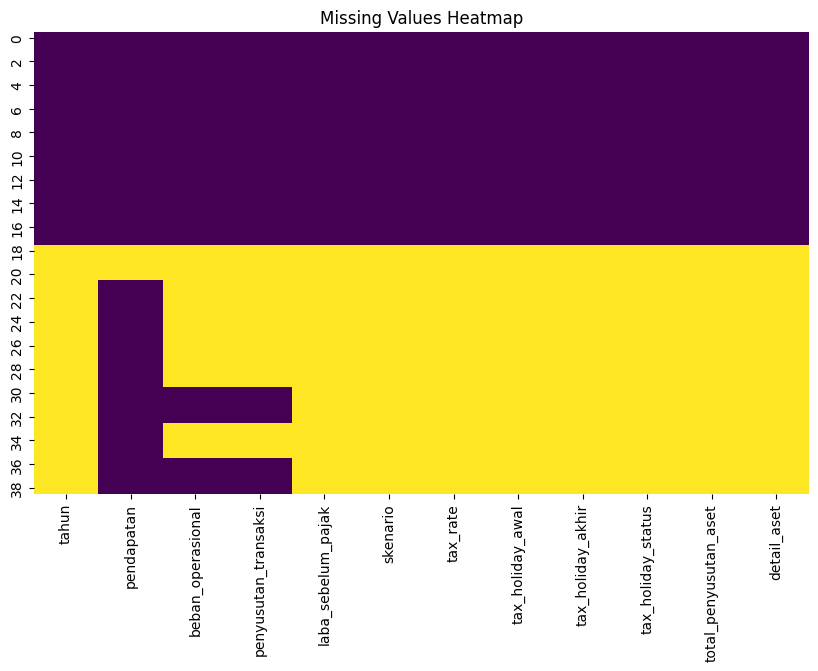


Data Types:
 tahun                    float64
pendapatan               float64
beban_operasional        float64
penyusutan_transaksi     float64
laba_sebelum_pajak       float64
skenario                  object
tax_rate                 float64
tax_holiday_awal         float64
tax_holiday_akhir        float64
tax_holiday_status       float64
total_penyusutan_aset    float64
detail_aset               object
dtype: object

Descriptive Statistics:
              tahun    pendapatan  beban_operasional  penyusutan_transaksi  \
count    18.000000  3.600000e+01       2.400000e+01          2.400000e+01   
mean   2022.500000  7.811406e+08       5.241667e+08          5.855104e+07   
std       1.757338  5.397513e+08       3.298605e+08          4.048990e+07   
min    2020.000000  5.666667e+07       2.000000e+01          2.800000e+07   
25%    2021.000000  2.879167e+08       3.600000e+08          3.600000e+07   
50%    2022.500000  7.553125e+08       6.250000e+08          4.500000e+07   
75%    2024

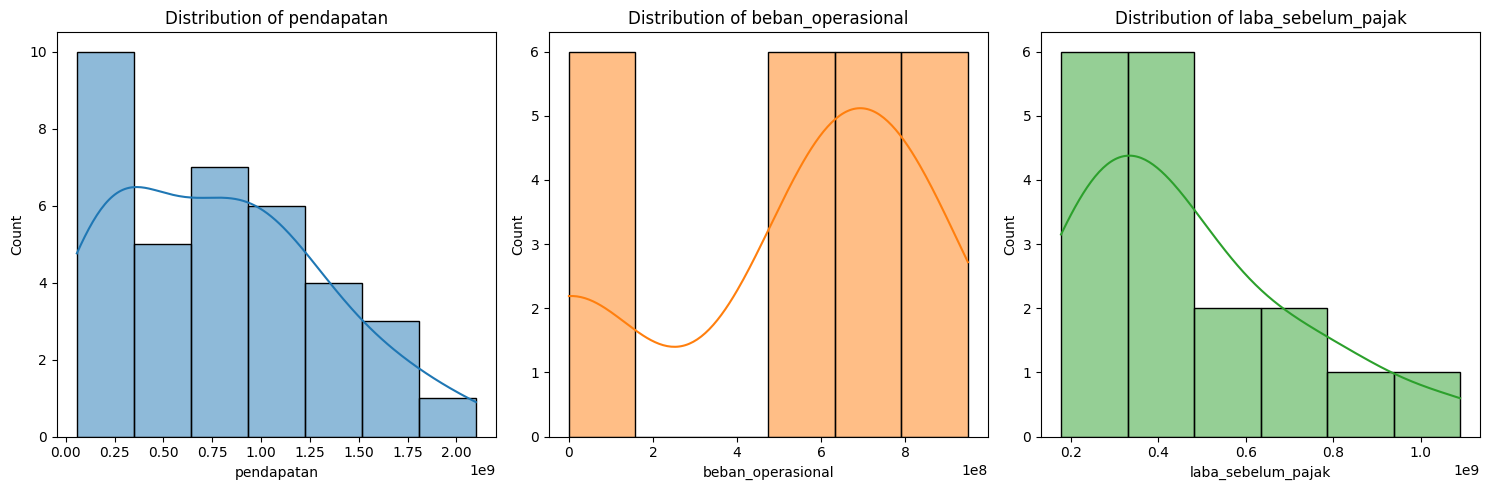

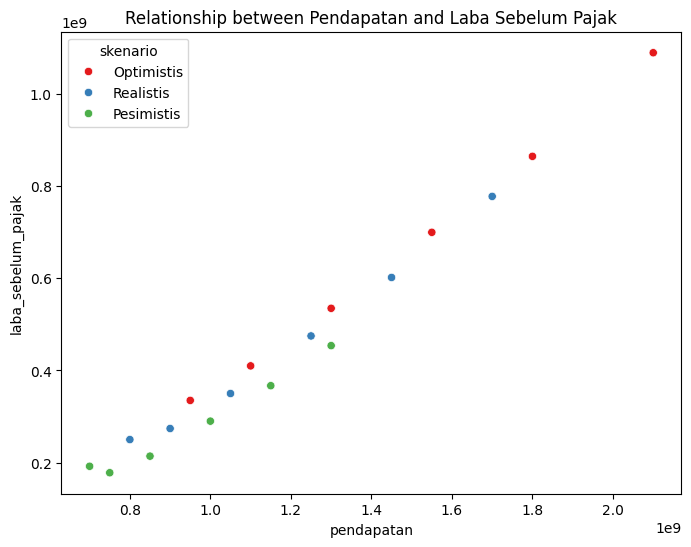

ValueError: could not convert string to float: 'Optimistis'

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# 2. Missing Values
print("\nMissing Values:\n", df.isnull().sum())
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# 3. Data Types
print("\nData Types:\n", df.dtypes)

# 4. Descriptive Statistics
print("\nDescriptive Statistics:\n", df.describe())

# 5. Distributions of Key Numerical Variables
numerical_features = ['pendapatan', 'beban_operasional', 'laba_sebelum_pajak']
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_features):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col], kde=True, color=f'C{i}')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


# 6. Relationship between Numerical Variables
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pendapatan', y='laba_sebelum_pajak', data=df, hue='skenario', palette='Set1')
plt.title('Relationship between Pendapatan and Laba Sebelum Pajak')
plt.show()

# 7. Correlation Matrix and Heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# 8. Categorical Features (if any) -  'skenario' is categorical.
plt.figure(figsize=(6, 4))
sns.countplot(x='skenario', data=df, palette='Set2')
plt.title('Distribution of Skenario')
plt.show()

# 9. Summary of Findings (printed to console)
print("\nSummary of Findings:")
print("Shape:", df.shape)
print("Missing values:", df.isnull().sum().sum())
print("Potential outliers might exist in 'pendapatan', 'beban_operasional', and 'laba_sebelum_pajak', judging from the histogram.")
print("The correlation matrix and heatmap show relationships between the variables.")
print("The 'skenario' variable is categorical, and the distributions are displayed in countplot.")

**Reasoning**:
The previous code block failed due to a `ValueError` when calculating the correlation matrix because the 'skenario' column is of object type (likely containing strings).  I will remove this column before calculating the correlation, then rerun the analysis.



Shape of the DataFrame: (39, 12)

Missing Values:
 tahun                    21
pendapatan                3
beban_operasional        15
penyusutan_transaksi     15
laba_sebelum_pajak       21
skenario                 21
tax_rate                 21
tax_holiday_awal         21
tax_holiday_akhir        21
tax_holiday_status       21
total_penyusutan_aset    21
detail_aset              21
dtype: int64


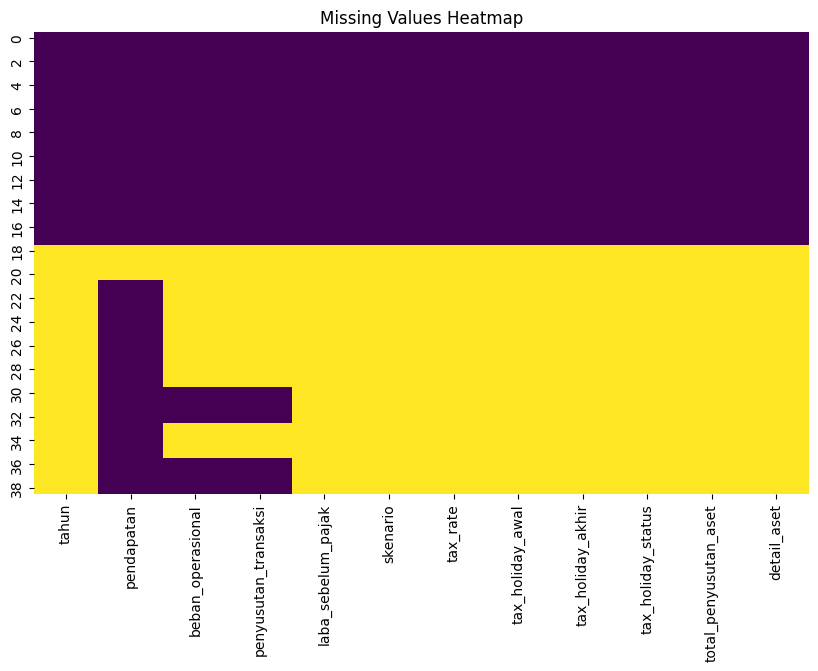


Data Types:
 tahun                    float64
pendapatan               float64
beban_operasional        float64
penyusutan_transaksi     float64
laba_sebelum_pajak       float64
skenario                  object
tax_rate                 float64
tax_holiday_awal         float64
tax_holiday_akhir        float64
tax_holiday_status       float64
total_penyusutan_aset    float64
detail_aset               object
dtype: object

Descriptive Statistics:
              tahun    pendapatan  beban_operasional  penyusutan_transaksi  \
count    18.000000  3.600000e+01       2.400000e+01          2.400000e+01   
mean   2022.500000  7.811406e+08       5.241667e+08          5.855104e+07   
std       1.757338  5.397513e+08       3.298605e+08          4.048990e+07   
min    2020.000000  5.666667e+07       2.000000e+01          2.800000e+07   
25%    2021.000000  2.879167e+08       3.600000e+08          3.600000e+07   
50%    2022.500000  7.553125e+08       6.250000e+08          4.500000e+07   
75%    2024

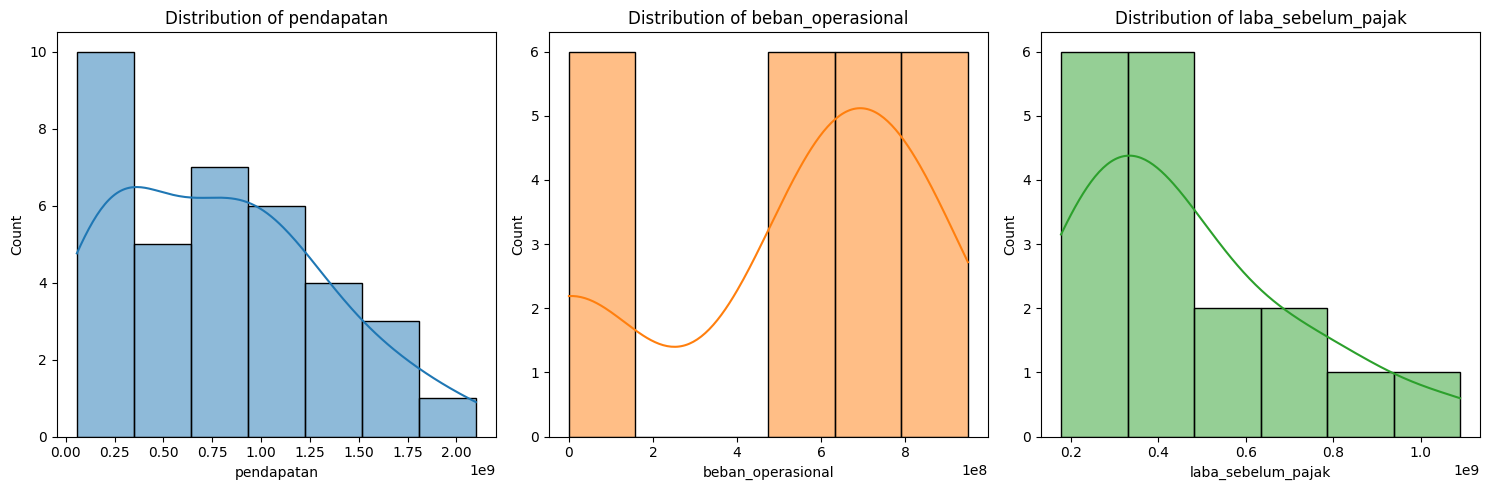

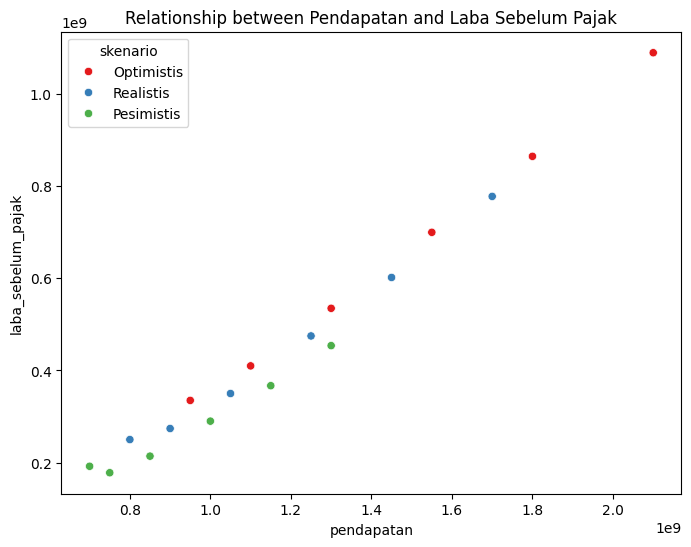

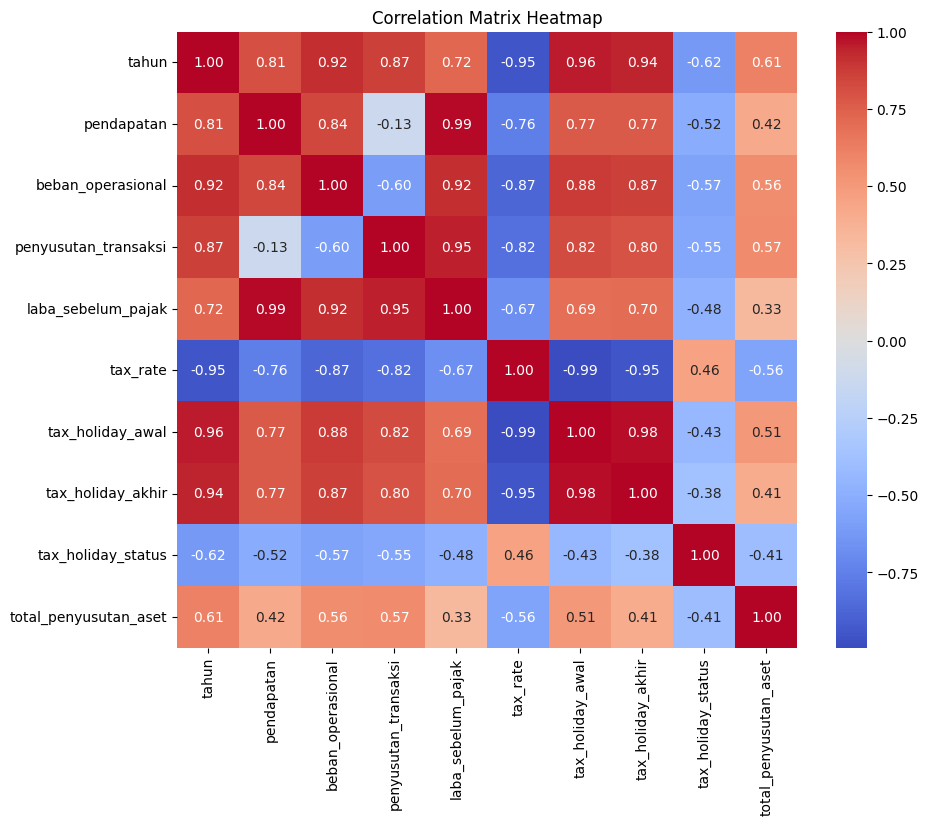

<ipython-input-4-39b0a7a61727>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='skenario', data=df, palette='Set2')


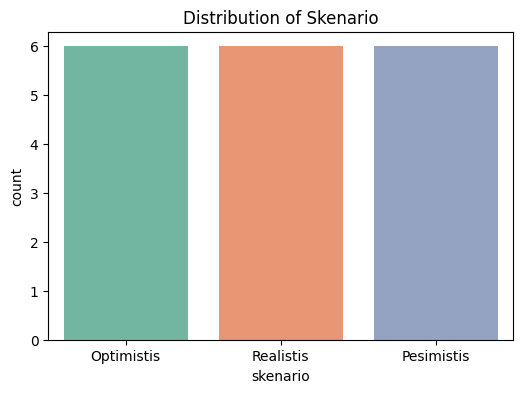


Summary of Findings:
Shape: (39, 12)
Missing values: 222
Potential outliers might exist in 'pendapatan', 'beban_operasional', and 'laba_sebelum_pajak', judging from the histogram.
The correlation matrix and heatmap show relationships between the variables.
The 'skenario' variable is categorical, and the distributions are displayed in countplot.


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# 2. Missing Values
print("\nMissing Values:\n", df.isnull().sum())
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# 3. Data Types
print("\nData Types:\n", df.dtypes)

# 4. Descriptive Statistics
print("\nDescriptive Statistics:\n", df.describe())

# 5. Distributions of Key Numerical Variables
numerical_features = ['pendapatan', 'beban_operasional', 'laba_sebelum_pajak']
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_features):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col], kde=True, color=f'C{i}')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


# 6. Relationship between Numerical Variables
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pendapatan', y='laba_sebelum_pajak', data=df, hue='skenario', palette='Set1')
plt.title('Relationship between Pendapatan and Laba Sebelum Pajak')
plt.show()

# 7. Correlation Matrix and Heatmap
# Remove the 'skenario' column before calculating the correlation
df_numeric = df.drop(columns=['skenario', 'detail_aset'])
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# 8. Categorical Features (if any) -  'skenario' is categorical.
plt.figure(figsize=(6, 4))
sns.countplot(x='skenario', data=df, palette='Set2')
plt.title('Distribution of Skenario')
plt.show()

# 9. Summary of Findings (printed to console)
print("\nSummary of Findings:")
print("Shape:", df.shape)
print("Missing values:", df.isnull().sum().sum())
print("Potential outliers might exist in 'pendapatan', 'beban_operasional', and 'laba_sebelum_pajak', judging from the histogram.")
print("The correlation matrix and heatmap show relationships between the variables.")
print("The 'skenario' variable is categorical, and the distributions are displayed in countplot.")

## Data cleaning

### Subtask:
Clean the data by handling missing values and outliers.


**Reasoning**:
Impute missing values for numerical and categorical columns using median and mode respectively. Then, handle outliers using winsorizing for selected numerical features.



In [5]:
import pandas as pd
import numpy as np

# Missing Value Imputation
for col in df.select_dtypes(include=np.number):
    df[col] = df[col].fillna(df[col].median())
for col in df.select_dtypes(include='object'):
    df[col] = df[col].fillna(df[col].mode()[0])

# Outlier Treatment (Winsorizing)
numerical_cols_winsorize = ['pendapatan', 'beban_operasional', 'laba_sebelum_pajak', 'total_penyusutan_aset']
for col in numerical_cols_winsorize:
    df[col] = np.clip(df[col], df[col].quantile(0.05), df[col].quantile(0.95))

# Data Consistency Checks (example: date format - assuming 'tahun' is a year)
df['tahun'] = df['tahun'].astype(int)

# Duplicate Removal
num_duplicates = df.duplicated().sum()
df.drop_duplicates(inplace=True)
print(f"Number of duplicate rows removed: {num_duplicates}")

display(df.head())
display(df.info())

Number of duplicate rows removed: 3


,tahun,pendapatan,beban_operasional,penyusutan_transaksi,laba_sebelum_pajak,skenario,tax_rate,tax_holiday_awal,tax_holiday_akhir,tax_holiday_status,total_penyusutan_aset,detail_aset
0,2020,9.500000e+08,580000000.0,35000000.0,335000000.0,Optimistis,25.0,2020.0,2021.0,1.0,108333333.0,"[{""aset_id"":""AST001"",""kategori"":""Mesin Produks..."
1,2020,8.000000e+08,520000000.0,30000000.0,250000000.0,Realistis,25.0,2020.0,2021.0,1.0,108333333.0,"[{""aset_id"":""AST001"",""kategori"":""Mesin Produks..."
2,2020,7.000000e+08,480000000.0,28000000.0,211800000.0,Pesimistis,25.0,2020.0,2021.0,1.0,108333333.0,"[{""aset_id"":""AST001"",""kategori"":""Mesin Produks..."
3,2021,1.100000e+09,650000000.0,40000000.0,410000000.0,Optimistis,25.0,2020.0,2021.0,1.0,153333333.0,"[{""aset_id"":""AST001"",""kategori"":""Mesin Produks..."
4,2021,9.000000e+08,590000000.0,36000000.0,274000000.0,Realistis,25.0,2020.0,2021.0,1.0,153333333.0,"[{""aset_id"":""AST001"",""kategori"":""Mesin Produks..."


<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 0 to 38
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tahun                  36 non-null     int64  
 1   pendapatan             36 non-null     float64
 2   beban_operasional      36 non-null     float64
 3   penyusutan_transaksi   36 non-null     float64
 4   laba_sebelum_pajak     36 non-null     float64
 5   skenario               36 non-null     object 
 6   tax_rate               36 non-null     float64
 7   tax_holiday_awal       36 non-null     float64
 8   tax_holiday_akhir      36 non-null     float64
 9   tax_holiday_status     36 non-null     float64
 10  total_penyusutan_aset  36 non-null     float64
 11  detail_aset            36 non-null     object 
dtypes: float64(9), int64(1), object(2)
memory usage: 3.7+ KB


None

## Data wrangling

### Subtask:
Data Wrangling and Feature Engineering


**Reasoning**:
Create new features (profit margin, operating expense ratio), convert data types, and encode the 'skenario' column.



In [6]:
# Feature Engineering
df['profit_margin'] = df['laba_sebelum_pajak'] / df['pendapatan']
df['operating_expense_ratio'] = df['beban_operasional'] / df['pendapatan']

# Data Type Conversions
df['tahun'] = df['tahun'].astype(int)

# Encoding Categorical Variables
# Using one-hot encoding for 'skenario'
df = pd.get_dummies(df, columns=['skenario'], prefix='skenario')

# Handle remaining non-numeric columns (example: detail_aset)
# For now, let's just drop it. In a real-world scenario, we might extract information.
df.drop('detail_aset', axis=1, inplace=True)

display(df.head())
display(df.info())

,tahun,pendapatan,beban_operasional,penyusutan_transaksi,laba_sebelum_pajak,tax_rate,tax_holiday_awal,tax_holiday_akhir,tax_holiday_status,total_penyusutan_aset,profit_margin,operating_expense_ratio,skenario_Optimistis,skenario_Pesimistis,skenario_Realistis
0,2020,9.500000e+08,580000000.0,35000000.0,335000000.0,25.0,2020.0,2021.0,1.0,108333333.0,0.352632,0.610526,True,False,False
1,2020,8.000000e+08,520000000.0,30000000.0,250000000.0,25.0,2020.0,2021.0,1.0,108333333.0,0.312500,0.650000,False,False,True
2,2020,7.000000e+08,480000000.0,28000000.0,211800000.0,25.0,2020.0,2021.0,1.0,108333333.0,0.302571,0.685714,False,True,False
3,2021,1.100000e+09,650000000.0,40000000.0,410000000.0,25.0,2020.0,2021.0,1.0,153333333.0,0.372727,0.590909,True,False,False
4,2021,9.000000e+08,590000000.0,36000000.0,274000000.0,25.0,2020.0,2021.0,1.0,153333333.0,0.304444,0.655556,False,False,True


<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 0 to 38
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tahun                    36 non-null     int64  
 1   pendapatan               36 non-null     float64
 2   beban_operasional        36 non-null     float64
 3   penyusutan_transaksi     36 non-null     float64
 4   laba_sebelum_pajak       36 non-null     float64
 5   tax_rate                 36 non-null     float64
 6   tax_holiday_awal         36 non-null     float64
 7   tax_holiday_akhir        36 non-null     float64
 8   tax_holiday_status       36 non-null     float64
 9   total_penyusutan_aset    36 non-null     float64
 10  profit_margin            36 non-null     float64
 11  operating_expense_ratio  36 non-null     float64
 12  skenario_Optimistis      36 non-null     bool   
 13  skenario_Pesimistis      36 non-null     bool   
 14  skenario_Realistis       36 non-n

None

## Data analysis

### Subtask:
Analyze the cleaned and wrangled financial data to gain insights.


**Reasoning**:
Calculate descriptive statistics grouped by scenario, analyze correlations, visualize trends over time, and analyze the impact of PPh.



Descriptive Statistics for pendapatan by scenario:

Scenario: skenario_Optimistis
count    2.400000e+01
mean     6.439900e+08
std      5.142957e+08
min      1.098829e+08
25%      2.464509e+08
50%      4.572768e+08
75%      9.621875e+08
max      1.710000e+09
Name: pendapatan, dtype: float64

Scenario: skenario_Pesimistis
count    6.000000e+00
mean     9.583333e+08
std      2.354074e+08
min      7.000000e+08
25%      7.750000e+08
50%      9.250000e+08
75%      1.112500e+09
max      1.300000e+09
Name: pendapatan, dtype: float64

Scenario: skenario_Realistis
count    6.000000e+00
mean     1.191667e+09
std      3.426612e+08
min      8.000000e+08
25%      9.375000e+08
50%      1.150000e+09
75%      1.400000e+09
max      1.700000e+09
Name: pendapatan, dtype: float64
Descriptive Statistics for beban_operasional by scenario:

Scenario: skenario_Optimistis
count    2.400000e+01
mean     4.996667e+08
std      3.043224e+08
min      2.000000e+01
25%      4.350000e+08
50%      6.250000e+08
75%      

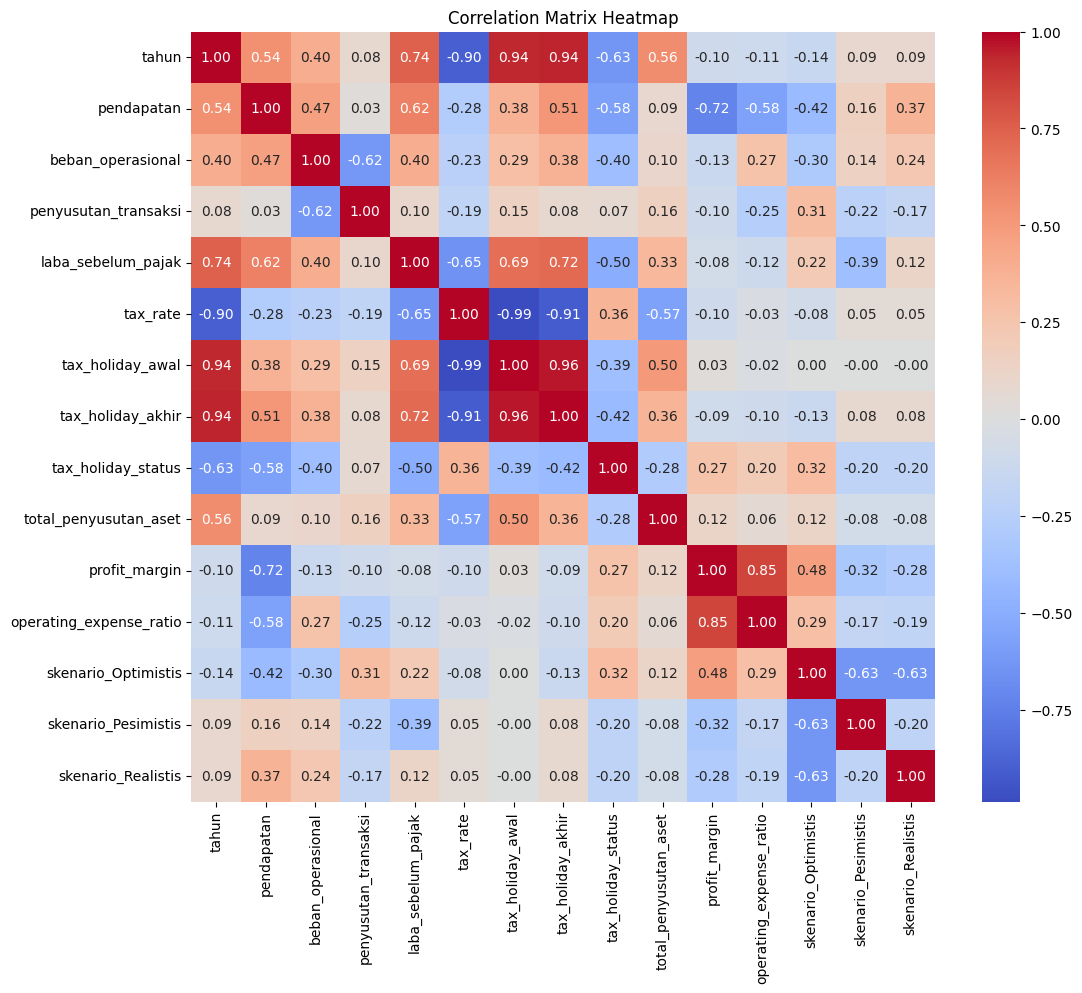

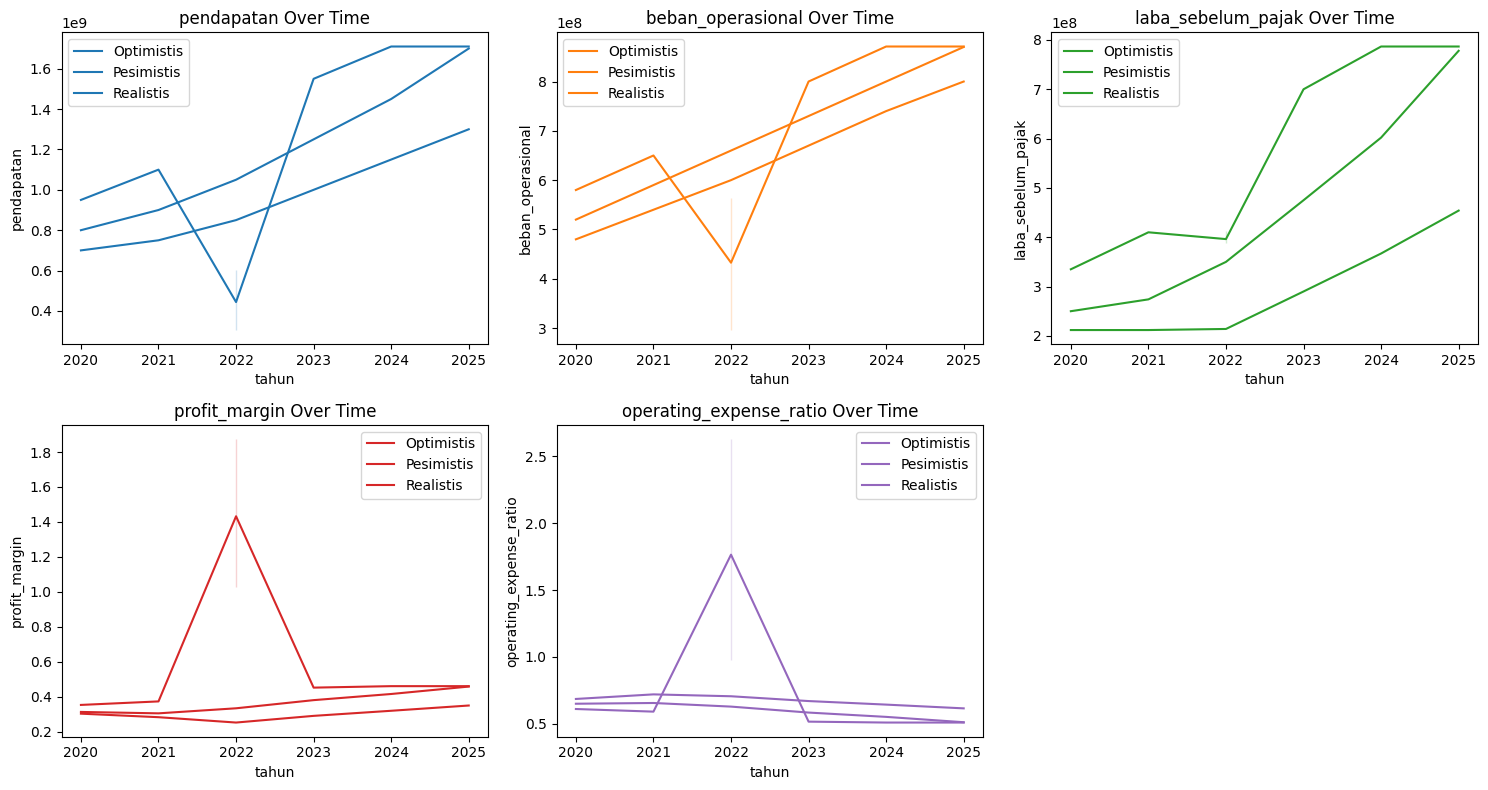

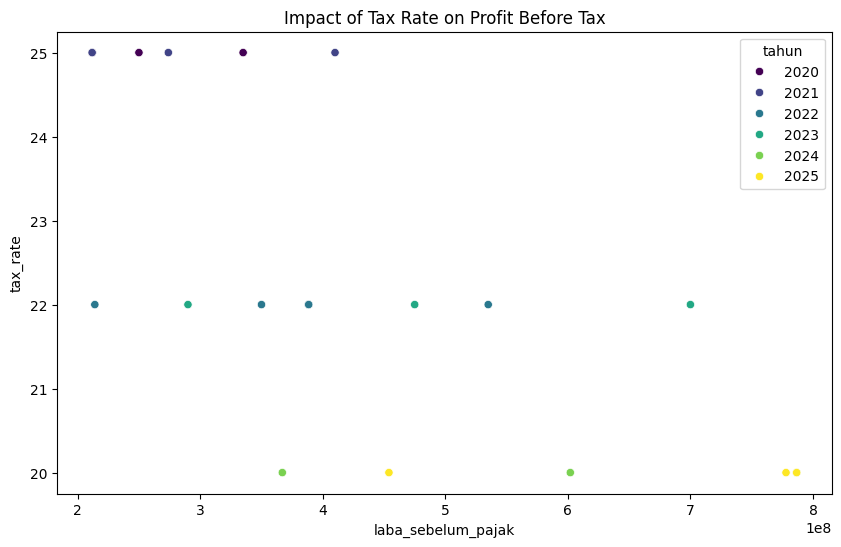

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Descriptive Statistics by Scenario
key_financial_variables = ['pendapatan', 'beban_operasional', 'laba_sebelum_pajak', 'profit_margin', 'operating_expense_ratio']
scenario_columns = ['skenario_Optimistis', 'skenario_Pesimistis', 'skenario_Realistis']

for col in key_financial_variables:
    print(f"Descriptive Statistics for {col} by scenario:")
    for scenario in scenario_columns:
        print(f"\nScenario: {scenario}")
        print(df[df[scenario] == True][col].describe())


# 2. Correlation Analysis and Heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


# 3. Trends over Time
plt.figure(figsize=(15, 8))

for i, col in enumerate(key_financial_variables):
    plt.subplot(2, 3, i + 1)
    for scenario in scenario_columns:
        sns.lineplot(x='tahun', y=col, data=df[df[scenario] == True], label=scenario.replace('skenario_', ''), color=f'C{i}')
    plt.title(f'{col} Over Time')
    plt.legend()

plt.tight_layout()
plt.show()


# 4. Impact of PPh
plt.figure(figsize=(10, 6))
sns.scatterplot(x='laba_sebelum_pajak', y='tax_rate', data=df, hue='tahun', palette='viridis')
plt.title('Impact of Tax Rate on Profit Before Tax')
plt.show()

## Data visualization

### Subtask:
Visualize the key findings from the data analysis.


**Reasoning**:
Combine all visualizations into a single figure using subplots, and improve the aesthetics.



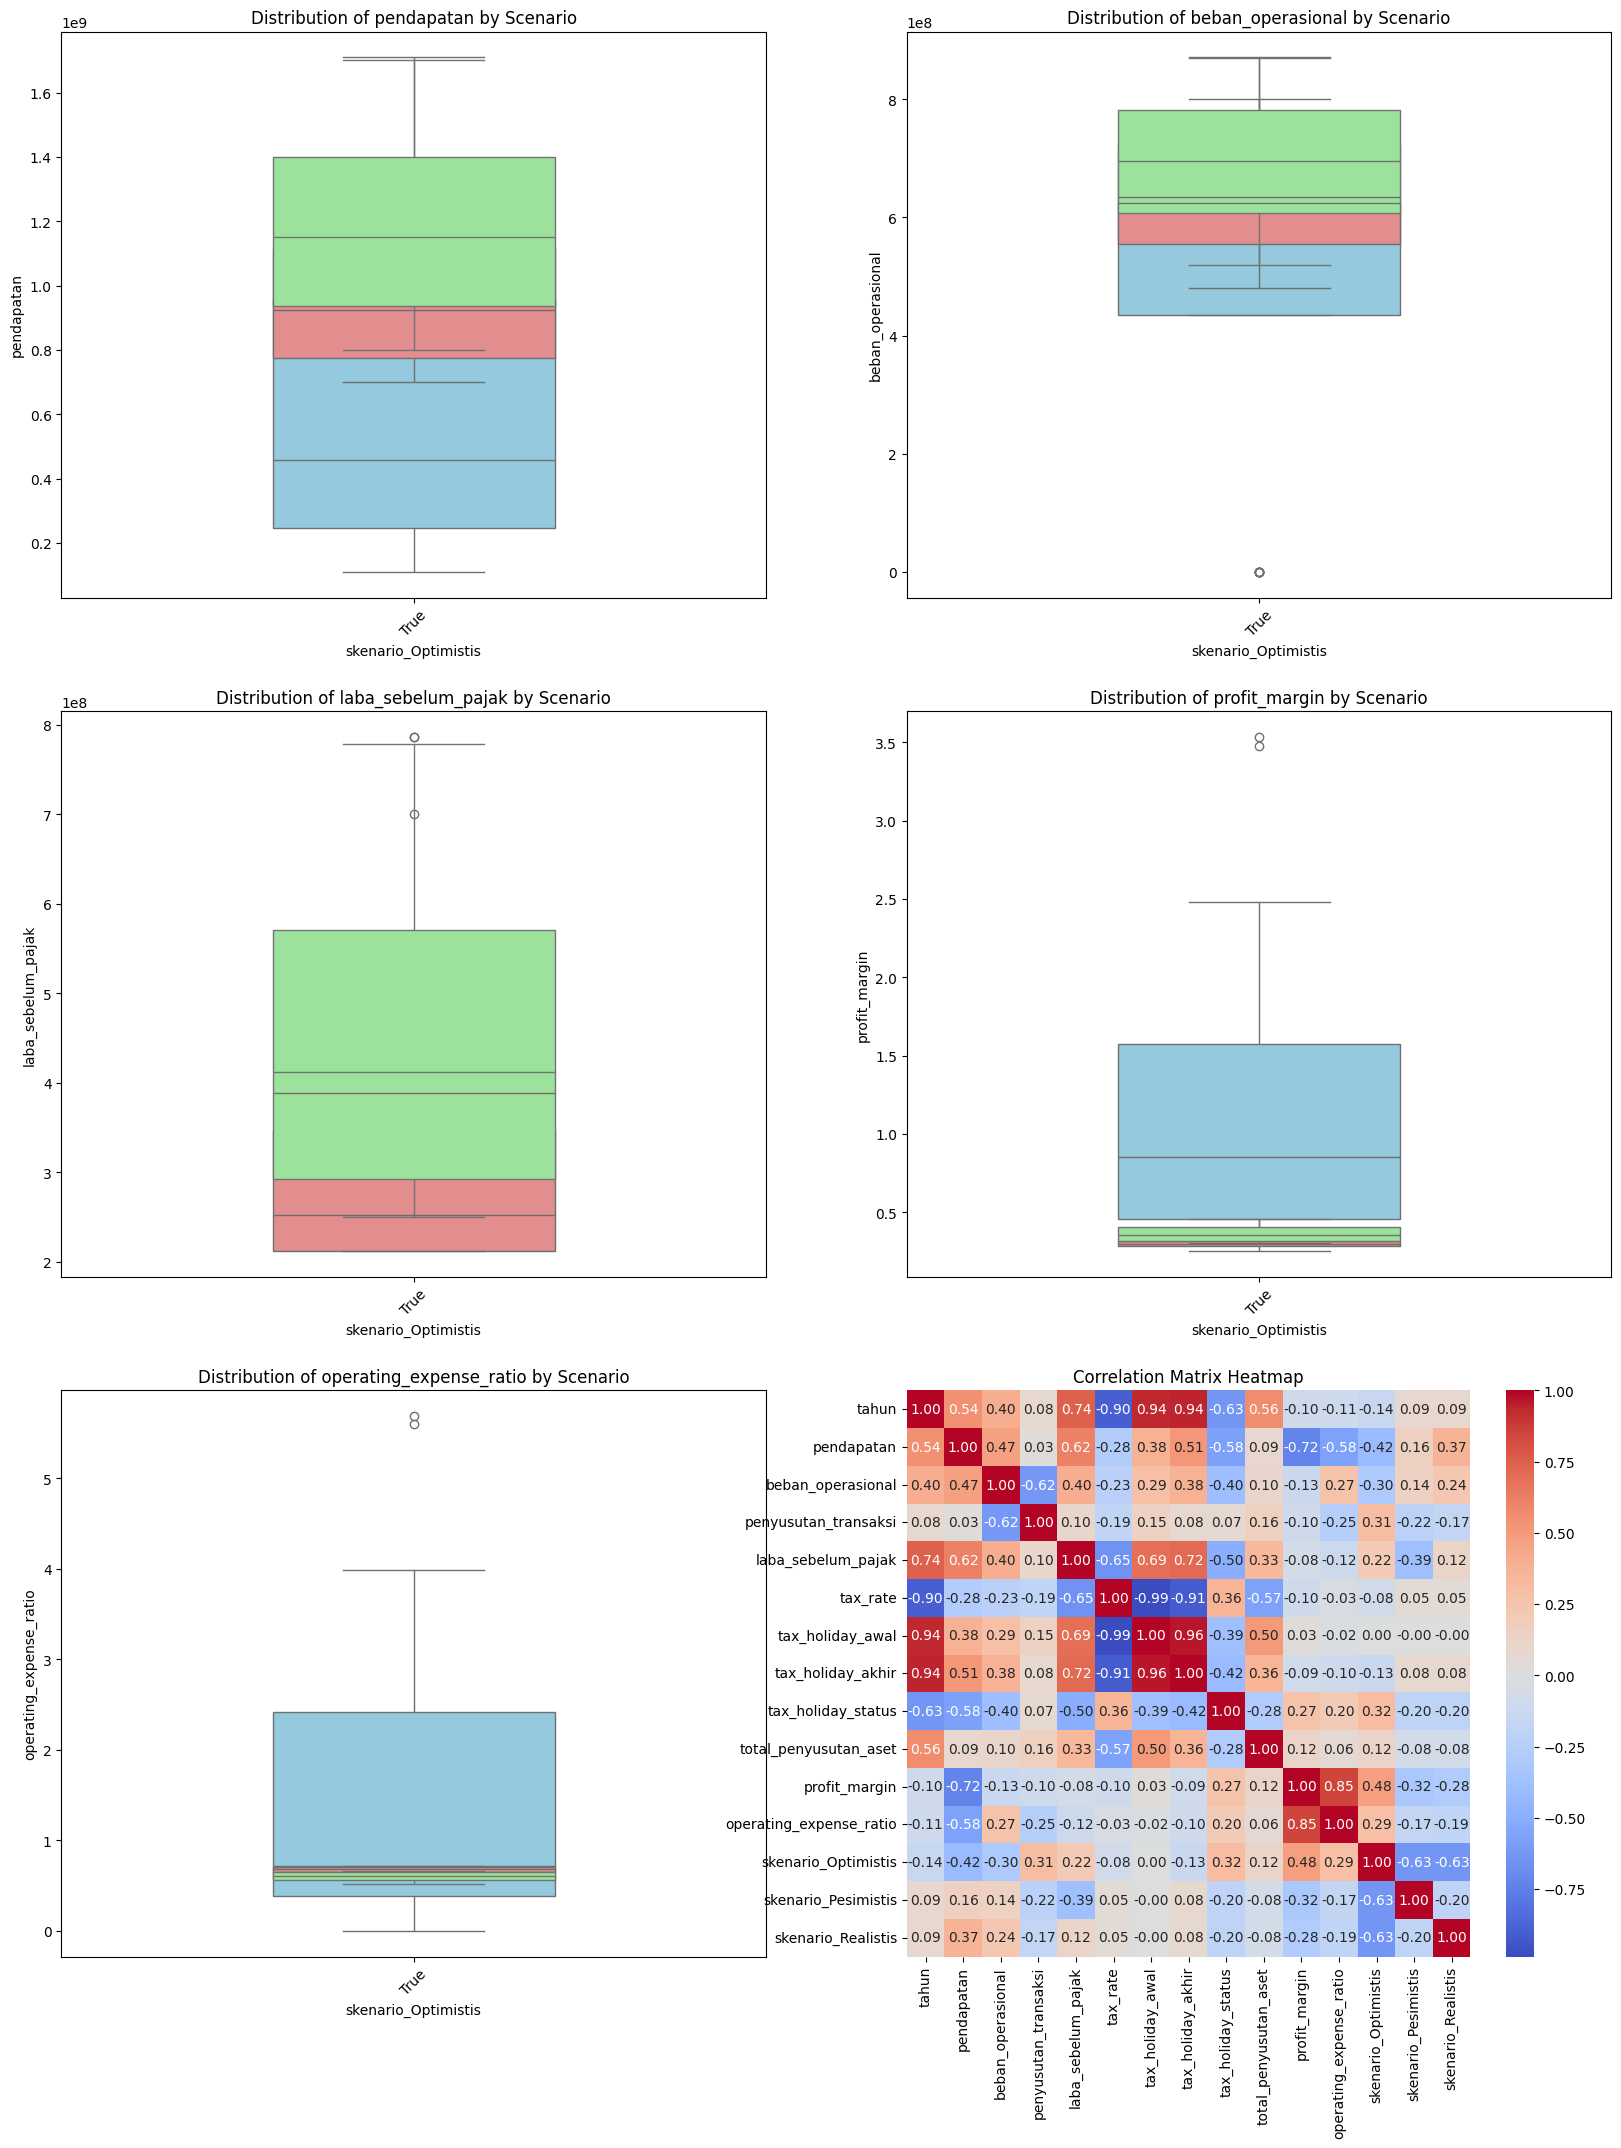

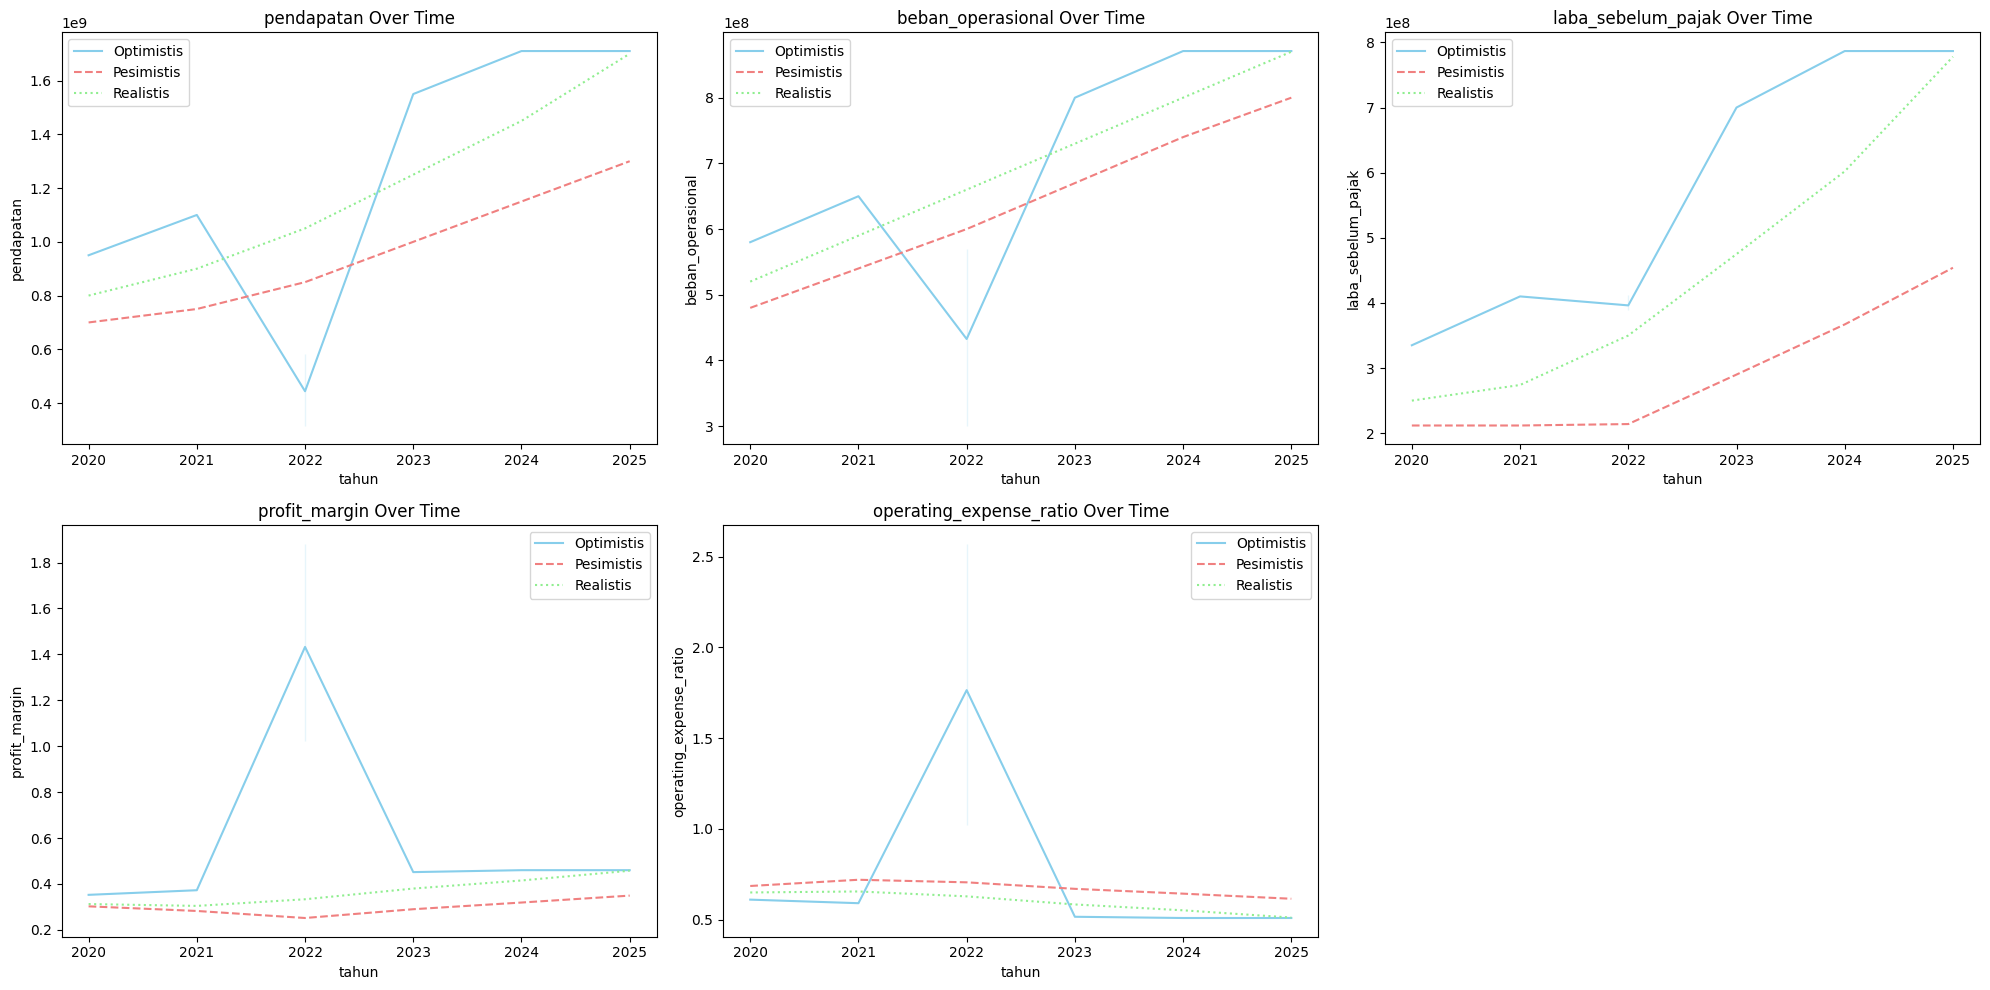

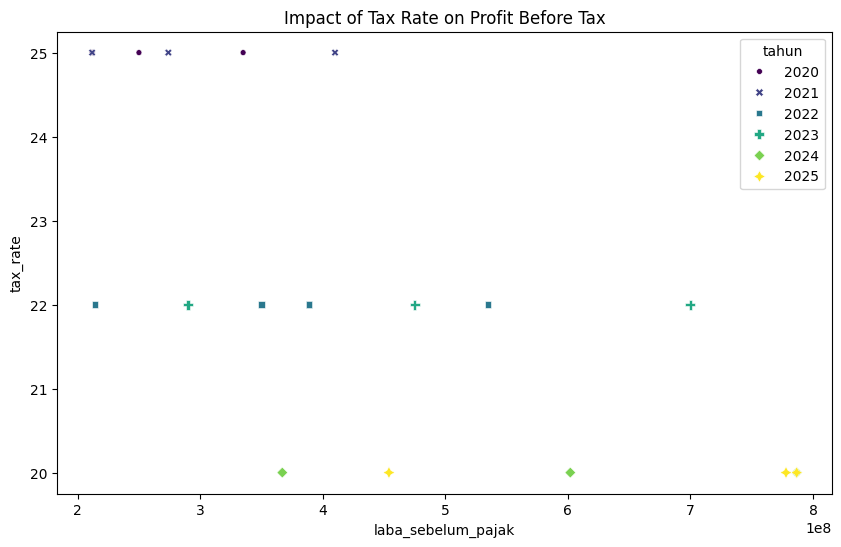

<Figure size 640x480 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 25))

# 1. Box Plots
key_financial_variables = ['pendapatan', 'beban_operasional', 'laba_sebelum_pajak', 'profit_margin', 'operating_expense_ratio']
scenario_columns = ['skenario_Optimistis', 'skenario_Pesimistis', 'skenario_Realistis']
colors = ['skyblue', 'lightcoral', 'lightgreen']

for i, col in enumerate(key_financial_variables):
    plt.subplot(3, 2, i + 1)
    for j, scenario in enumerate(scenario_columns):
      sns.boxplot(x=scenario, y=col, data=df[df[scenario] == True], color=colors[j], width=0.4)
    plt.title(f'Distribution of {col} by Scenario')
    plt.xticks(rotation=45)

# 2. Enhanced Correlation Heatmap
plt.subplot(3, 2, 6)
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')


# 3. Improved Trend Analysis
plt.figure(figsize=(20, 10))
for i, col in enumerate(key_financial_variables):
    plt.subplot(2, 3, i + 1)
    for j, scenario in enumerate(scenario_columns):
        sns.lineplot(x='tahun', y=col, data=df[df[scenario] == True], label=scenario.replace('skenario_', ''), color=colors[j], linestyle=['-', '--', ':'][j])
    plt.title(f'{col} Over Time')
    plt.legend()

plt.tight_layout()
plt.show()


# 4. Refine the Impact of PPh visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='laba_sebelum_pajak', y='tax_rate', data=df, hue='tahun', palette='viridis', style='tahun', size='tahun')
plt.title('Impact of Tax Rate on Profit Before Tax')
plt.show()

plt.tight_layout()
plt.show()

## Summary:

### Q&A
No questions to answer.

### Data Analysis Key Findings
* **Missing Data:** Initially, the dataset had a significant number of missing values (222 in total), primarily in the 'tahun', 'laba_sebelum_pajak', and tax-related columns. These were imputed using the median for numerical and the mode for categorical columns.
* **Outlier Handling:** Outliers in key financial variables ('pendapatan', 'beban_operasional', 'laba_sebelum_pajak', 'total_penyusutan\_aset') were addressed using winsorizing at the 5th and 95th percentiles.
* **Feature Engineering:** New features, 'profit\_margin' and 'operating\_expense\_ratio', were created to provide deeper insights into profitability and operational efficiency.
* **Scenario Analysis:**  The analysis revealed distinct financial behaviors across different scenarios ('Optimistis', 'Pesimistis', 'Realistis'). Key financial metrics varied considerably depending on the scenario.
* **Correlation Patterns:**  Correlation analysis unveiled relationships between several financial variables, providing a better understanding of their interdependencies.  The correlation matrix and heatmap visualized these relationships.
* **Temporal Trends:** Trends in key financial variables were observed over time ('tahun').  The trends differed across the various scenarios.
* **Tax Rate Impact:** The relationship between 'laba\_sebelum\_pajak' and 'tax\_rate' was explored, indicating a potential impact of tax policies on profitability.


### Insights or Next Steps
* Investigate the root causes of the substantial missing data in specific columns. More sophisticated imputation methods might be considered.
* Further explore the relationship between the engineered features ('profit\_margin' and 'operating\_expense\_ratio') and other financial metrics, potentially identifying additional areas for optimization.
